In [ ]:
#Import Library
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Load
file_path = '/content/Anxiety_Fixs - A1.csv'
df = pd.read_csv(file_path)
df_clean = df[1:].copy()

df.head(10)

,ID,Gender,Faculty,Department,Nature of God,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,On Human Nature,Unnamed: 10,Unnamed: 11,On Knowledge,On Ethic,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,On Reality
0,NaN,NaN,NaN,NaN,Q1,Q2,Q3,Q4,Q6,Q7,Q11,Q12,Q18,Q19,Q20,Q21,Q22,Q23,Q25
1,A1,Perempuan,TARBIYAH,Pendidikan Agama Islam,5,5,5,1,1,1,1,1,1,5,3,5,1,1,3
2,A2,Perempuan,TARBIYAH,Pendidikan Agama Islam,5,5,5,2,3,4,5,5,3,5,5,5,5,5,5
3,A3,Perempuan,TARBIYAH,Pendidikan Agama Islam,5,5,5,5,1,5,1,1,1,5,5,5,5,1,5
4,A4,Perempuan,TARBIYAH,Pendidikan Agama Islam,5,5,5,1,1,5,1,5,1,5,5,5,5,1,5
5,A5,Perempuan,TARBIYAH,Pendidikan Agama Islam,5,5,5,4,3,3,5,4,1,1,3,5,2,2,5
6,A6,Perempuan,TARBIYAH,Tadris Bahasa Inggris,3,5,5,2,2,2,1,1,1,4,4,4,3,2,3
7,A7,Perempuan,TARBIYAH,Tadris Bahasa Inggris,5,5,4,2,1,2,3,2,2,3,3,4,5,1,5
8,A8,Perempuan,TARBIYAH,Tadris Bahasa Inggris,3,5,4,3,3,5,5,5,5,5,5,5,5,2,3
9,A9,Perempuan,TARBIYAH,Tadris Bahasa Inggris,3,4,4,2,2,4,4,4,4,4,4,4,4,3,2


In [ ]:
# Reload the dataset with correct header (row 1 as header)
df = pd.read_csv(file_path, header=1)

# Daftar kolom yang ingin di-reverse scoring
reverse_columns = ['Q1', 'Q2', 'Q3', 'Q19', 'Q20', 'Q21', 'Q25']

# Lakukan reverse scoring: 1 -> 5, 2 -> 4, 3 -> 3, 4 -> 2, 5 -> 1
reverse_map = {1: 5, 2: 4, 3: 3, 4: 2, 5: 1}
df[reverse_columns] = df[reverse_columns].replace(reverse_map)

# Tampilkan beberapa baris awal dari kolom yang sudah di-reverse
df[reverse_columns].head(10)

,Q1,Q2,Q3,Q19,Q20,Q21,Q25
0,1,1,1,1,3,1,3
1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1
4,1,1,1,5,3,1,1
5,3,1,1,2,2,2,3
6,1,1,2,3,3,2,1
7,3,1,2,1,1,1,3
8,3,2,2,2,2,2,4
9,1,1,1,3,2,3,3


In [ ]:
# Menjumlahkan skor berdasarkan aspek
df['Nature_of_God'] = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q6']].sum(axis=1)
df['On_Human_Nature'] = df[['Q7', 'Q11', 'Q12']].sum(axis=1)
df['On_Knowledge'] = df['Q18']
df['On_Ethic'] = df[['Q19', 'Q20', 'Q21', 'Q22', 'Q23']].sum(axis=1)
df['On_Reality'] = df['Q25']

df[['On_Human_Nature','On_Knowledge', 'On_Ethic','On_Reality']].head(10)

,On_Human_Nature,On_Knowledge,On_Ethic,On_Reality
0,3,1,7,3
1,14,3,13,1
2,7,1,9,1
3,11,1,9,1
4,12,1,13,1
5,4,1,11,3
6,7,2,14,1
7,15,5,10,3
8,12,4,13,4
9,13,2,13,3


In [ ]:
# Lalu totalkan seluruh skor sebagai skor anxiety total
df['Total_Anxiety_Score'] = df[['On_Human_Nature','On_Knowledge', 'On_Ethic','On_Reality']].sum(axis=1)


In [ ]:
# Buat label Anxiety berdasarkan skor total:
# 10-23 = Mild, 24-34 = Moderate, 37-50 = Severe
def classify_anxiety(score):
    if score <= 23:
        return 'Mild'
    elif score <= 34:
        return 'Moderate'
    else:
        return 'Severe'

df['Anxiety_Level'] = df['Total_Anxiety_Score'].apply(classify_anxiety)

df[['Total_Anxiety_Score', 'Anxiety_Level']].head(10)

,Total_Anxiety_Score,Anxiety_Level
0,14,Mild
1,31,Moderate
2,18,Mild
3,22,Mild
4,27,Moderate
5,19,Mild
6,24,Moderate
7,33,Moderate
8,33,Moderate
9,31,Moderate


In [ ]:
# Ganti nama kolom Unnamed: 0 - Unnamed: 3 menjadi yang sesuai
df.rename(columns={
    'Unnamed: 0': 'ID',
    'Unnamed: 1': 'Gender',
    'Unnamed: 2': 'Faculty',
    'Unnamed: 3': 'Department'
}, inplace=True)

In [ ]:
#Bersihkan dan encode kolom Gender
# Hilangkan spasi dan normalisasi format
df['Gender'] = df['Gender'].str.replace(' - ', '-', regex=False).str.strip()

# Tambahkan Gender_Code (0 = Perempuan, 1 = Laki-laki)
df['Gender_Code'] = df['Gender'].map({'Perempuan': 0, 'Laki-laki': 1})

df[['Gender', 'Gender_Code']].head(70-80)

,Gender,Gender_Code
0,Perempuan,0
1,Perempuan,0
2,Perempuan,0
3,Perempuan,0
4,Perempuan,0
...,...,...
131,Laki-laki,1
132,Laki-laki,1
133,Laki-laki,1
134,Laki-laki,1


In [ ]:
# Encode kolom prodi
le_prodi = LabelEncoder()
df['Department_encoded'] = le_prodi.fit_transform(df['Department'])

# Cek hasil encoding
print(df[['Department', 'Department_encoded']].drop_duplicates().sort_values('Department_encoded'))


                          Department  Department_encoded
72                     Agroteknologi                   0
20             Akidah Filsafat Islam                   1
38                     Ekonomi Islam                   2
55                           Farmasi                   3
50                              Gizi                   4
44            Hubungan International                   5
23             Hukum Ekonomi Syariah                   6
15         Ilmu Al-Qur'an dan Tafsir                   7
123  Keselamatan dan Kesehatan Kerja                   8
33                         Manajemen                   9
0             Pendidikan Agama Islam                  10
10            Pendidikan Bahasa Arab                  11
28              Perbandingan Madzhab                  12
109                Studi Agama-agama                  13
5              Tadris Bahasa Inggris                  14
60                Teknik Informatika                  15
144     Teknologi Industri Pert

In [ ]:
#Siapkan Fitur dan Label
X = df[['Nature_of_God', 'On_Human_Nature', 'On_Knowledge', 'On_Ethic', 'On_Reality','Gender_Code', 'Department_encoded']]
y = df['Anxiety_Level']


In [ ]:
#Split Train & Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
#Buat & Latih Model SVM
svm_model = SVC(C=10, gamma=0.01, kernel='rbf')
svm_model.fit(X_train, y_train)

SVC(C=10, gamma=0.01)

In [ ]:
#Prediksi & Evaluasi
y_pred = svm_model.predict(X_test)

In [ ]:
# Tampilkan akurasi
acc = accuracy_score(y_test, y_pred)
print(f"Akurasi SVM: {acc:.2f}")

Akurasi SVM: 0.97


In [ ]:
print("Kelas unik di y_test:", np.unique(y_test))


Kelas unik di y_test: ['Mild' 'Moderate']


Classification Report:
              precision    recall  f1-score   support

        Mild       1.00      0.92      0.96        12
    Moderate       0.95      1.00      0.97        18

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



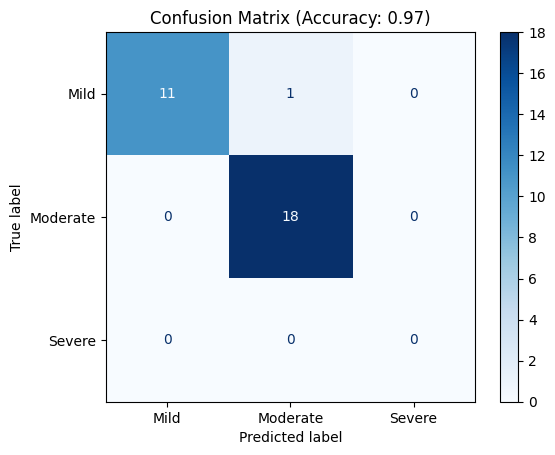

In [ ]:
#Classification Report & Confusion Matrix
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Mild', 'Moderate']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=['Mild', 'Moderate', 'Severe'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Mild', 'Moderate', 'Severe'])
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix (Accuracy: {acc:.2f})')
plt.show()


In [ ]:
# Hitung jumlah per label stres
Anxiety_counts = df['Anxiety_Level'].value_counts().sort_index()

# Hitung persentase tiap label
Anxiety_percent = (Anxiety_counts / Anxiety_counts.sum()) * 100

# Gabungkan jumlah dan persentase dalam satu dataframe
Anxiety_df = pd.DataFrame({
    'Jumlah': Anxiety_counts,
    'Persentase (%)': Anxiety_percent.round(2)
})

print("Distribusi Tingkat Kecemasan:")
print(Anxiety_df)


Distribusi Tingkat Kecemasan:
               Jumlah  Persentase (%)
Anxiety_Level                        
Mild               58           39.73
Moderate           84           57.53
Severe              4            2.74


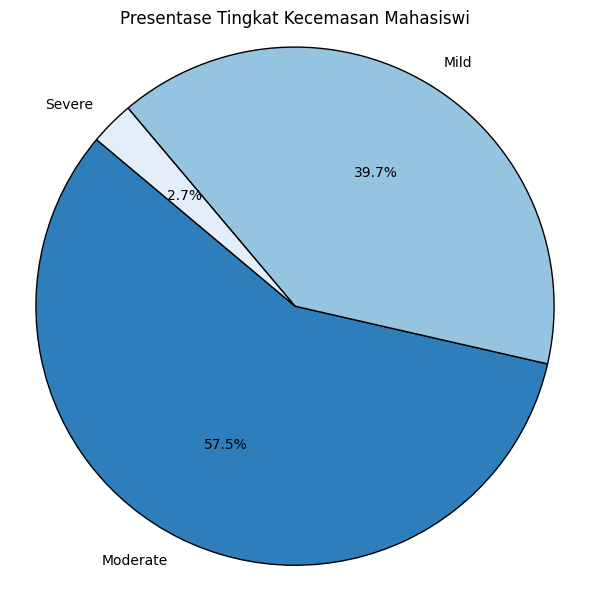

In [ ]:
# Hitung jumlah per label kecemasan (misalnya kolom bernama 'Anxiety')
anxiety_counts = df['Anxiety_Level'].value_counts()
anxiety_percent = (anxiety_counts / anxiety_counts.sum()) * 100

# Buat pie chart
plt.figure(figsize=(6, 6))
plt.pie(anxiety_counts,
        labels=anxiety_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Blues_r(np.linspace(0.3, 0.9, len(anxiety_counts))),
        wedgeprops={'edgecolor': 'black'})

plt.title('Presentase Tingkat Kecemasan Mahasiswi')
plt.axis('equal')  # Membuat pie chart jadi lingkaran sempurna
plt.tight_layout()
plt.show()


In [ ]:
# Total seluruh stres (tanpa rinci per label)
total_stress_by_gender = df['Gender'].value_counts()
print("Total Responden per Gender:")
print(total_stress_by_gender)

Total Responden per Gender:
Gender
Perempuan    73
Laki-laki    73
Name: count, dtype: int64


In [ ]:
# Hitung jumlah Mild, Moderate, Severe per gender
stress_counts = df.groupby(['Gender','Anxiety_Level']).size().unstack().fillna(0)
print("Jumlah Responden per Tingkat Kecemasan dan Gender:")
print(stress_counts)


Jumlah Responden per Tingkat Kecemasan dan Gender:
Anxiety_Level  Mild  Moderate  Severe
Gender                               
Laki-laki        23        47       3
Perempuan        35        37       1


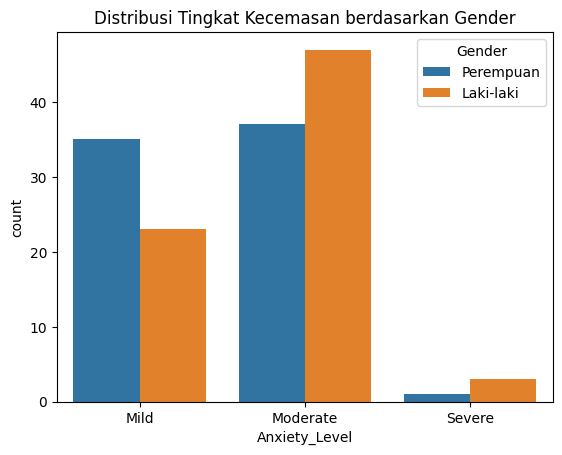

In [ ]:
sns.countplot(x='Anxiety_Level', hue='Gender', data=df)
plt.title('Distribusi Tingkat Kecemasan berdasarkan Gender')
plt.show()


Rata-rata Skor EAQ per Gender:
Gender
Laki-laki    26.808219
Perempuan    23.753425
Name: Total_Anxiety_Score, dtype: float64


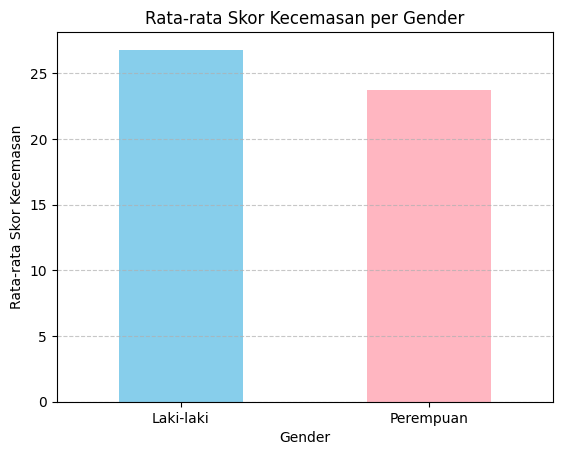

In [ ]:
# Hitung rata-rata total skor EAQ per gender
avg_eaq_by_gender = df.groupby('Gender')['Total_Anxiety_Score'].mean()
print("Rata-rata Skor EAQ per Gender:")
print(avg_eaq_by_gender)

# Visualisasi rata-rata skor kecemasan per gender
avg_eaq_by_gender.plot(kind='bar', color=['skyblue', 'lightpink'])
plt.title('Rata-rata Skor Kecemasan per Gender')
plt.xlabel('Gender')
plt.ylabel('Rata-rata Skor Kecemasan')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
if avg_eaq_by_gender['Perempuan'] > avg_eaq_by_gender['Laki-laki']:
    print("🔍 Perempuan cenderung memiliki tingkat Kecemasan lebih tinggi.")
elif avg_eaq_by_gender['Perempuan'] < avg_eaq_by_gender['Laki-laki']:
    print("🔍 Laki-laki cenderung memiliki tingkat Kecemasan lebih tinggi.")
else:
    print("🔍 Rata-rata tingkat Kecemasan antara laki-laki dan perempuan seimbang.")


🔍 Laki-laki cenderung memiliki tingkat Kecemasan lebih tinggi.


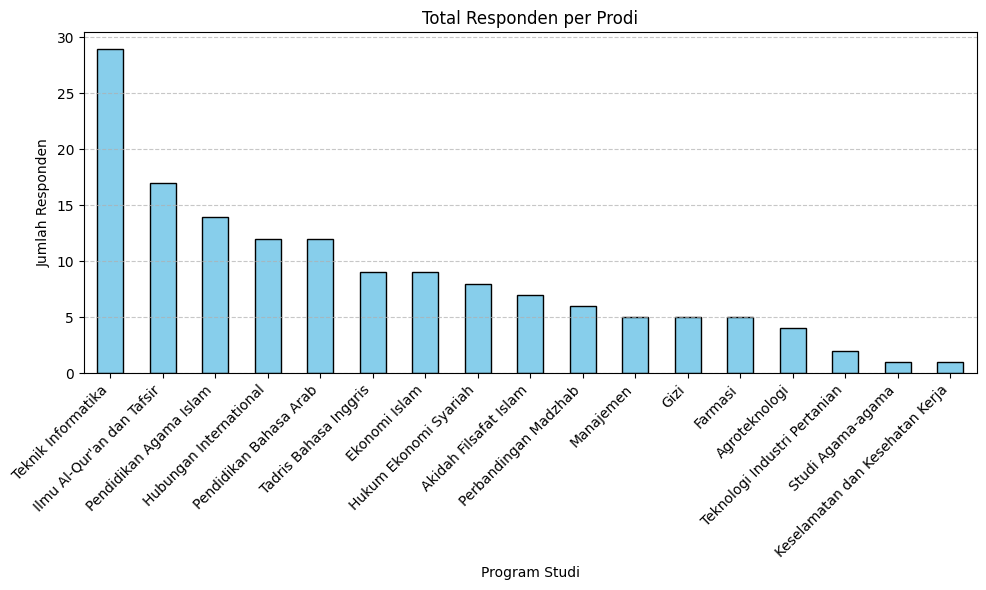

In [ ]:
# Hitung jumlah responden per prodi
responden_per_prodi = df['Department'].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 6))
responden_per_prodi.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Total Responden per Prodi')
plt.xlabel('Program Studi')
plt.ylabel('Jumlah Responden')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Hitung jumlah Mild, Moderate, Severe per gender
stress_counts = df.groupby(['Department','Anxiety_Level']).size().unstack().fillna(0)
print("Jumlah Responden per Tingkat Kecemasan dan Prodi:")
print(stress_counts)

Jumlah Responden per Tingkat Kecemasan dan Prodi:
Anxiety_Level                    Mild  Moderate  Severe
Department                                             
Agroteknologi                     1.0       3.0     0.0
Akidah Filsafat Islam             2.0       5.0     0.0
Ekonomi Islam                     2.0       7.0     0.0
Farmasi                           5.0       0.0     0.0
Gizi                              1.0       4.0     0.0
Hubungan International            5.0       6.0     1.0
Hukum Ekonomi Syariah             5.0       3.0     0.0
Ilmu Al-Qur'an dan Tafsir         5.0      10.0     2.0
Keselamatan dan Kesehatan Kerja   0.0       1.0     0.0
Manajemen                         0.0       5.0     0.0
Pendidikan Agama Islam            7.0       7.0     0.0
Pendidikan Bahasa Arab            5.0       7.0     0.0
Perbandingan Madzhab              3.0       3.0     0.0
Studi Agama-agama                 0.0       1.0     0.0
Tadris Bahasa Inggris             2.0       7.0     0.

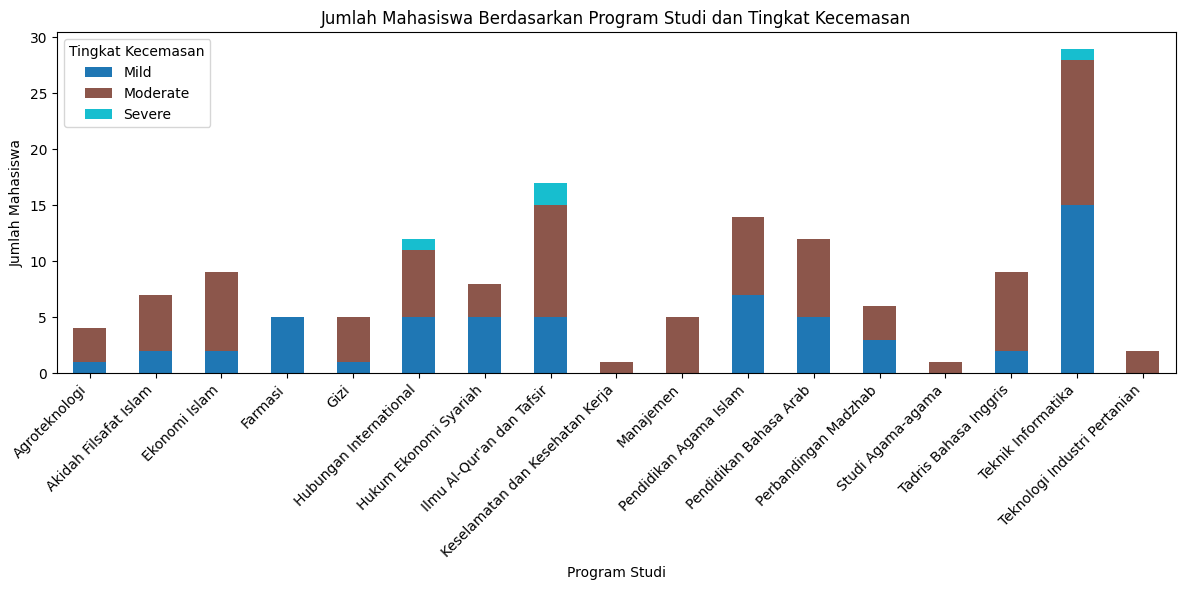

In [ ]:
# Hitung jumlah mahasiswa per tingkat stres dan prodi
prodi_stress_counts = df.groupby(['Department', 'Anxiety_Level']).size().unstack(fill_value=0)

# Buat stacked bar chart
prodi_stress_counts.plot(kind='bar',
                         stacked=True,
                         colormap='tab10',
                         figsize=(12, 6))

plt.title('Jumlah Mahasiswa Berdasarkan Program Studi dan Tingkat Kecemasan')
plt.xlabel('Program Studi')
plt.ylabel('Jumlah Mahasiswa')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tingkat Kecemasan')
plt.tight_layout()
plt.show()


In [ ]:
department_stats = df.groupby('Department').agg(
    Rata2_anxiety=('Total_Anxiety_Score', 'mean'),
    Jumlah_Responden=('Total_Anxiety_Score', 'count')
)

# Tampilkan dulu biar yakin
print("Sebelum filter:\n", department_stats)

Sebelum filter:
                                  Rata2_anxiety  Jumlah_Responden
Department                                                      
Agroteknologi                        28.000000                 4
Akidah Filsafat Islam                27.571429                 7
Ekonomi Islam                        27.333333                 9
Farmasi                              20.000000                 5
Gizi                                 25.200000                 5
Hubungan International               25.000000                12
Hukum Ekonomi Syariah                22.000000                 8
Ilmu Al-Qur'an dan Tafsir            27.705882                17
Keselamatan dan Kesehatan Kerja      31.000000                 1
Manajemen                            25.800000                 5
Pendidikan Agama Islam               24.000000                14
Pendidikan Bahasa Arab               25.166667                12
Perbandingan Madzhab                 20.000000                 6
Studi Ag

In [ ]:
# Buat threshold minimal responden (misalnya 5)
min_responden = 5

# Filter
filtered_stats = department_stats[department_stats['Jumlah_Responden'] >= min_responden]

print("Setelah filter:\n", filtered_stats)


Setelah filter:
                            Rata2_anxiety  Jumlah_Responden
Department                                                
Akidah Filsafat Islam          27.571429                 7
Ekonomi Islam                  27.333333                 9
Farmasi                        20.000000                 5
Gizi                           25.200000                 5
Hubungan International         25.000000                12
Hukum Ekonomi Syariah          22.000000                 8
Ilmu Al-Qur'an dan Tafsir      27.705882                17
Manajemen                      25.800000                 5
Pendidikan Agama Islam         24.000000                14
Pendidikan Bahasa Arab         25.166667                12
Perbandingan Madzhab           20.000000                 6
Tadris Bahasa Inggris          27.777778                 9
Teknik Informatika             24.620690                29


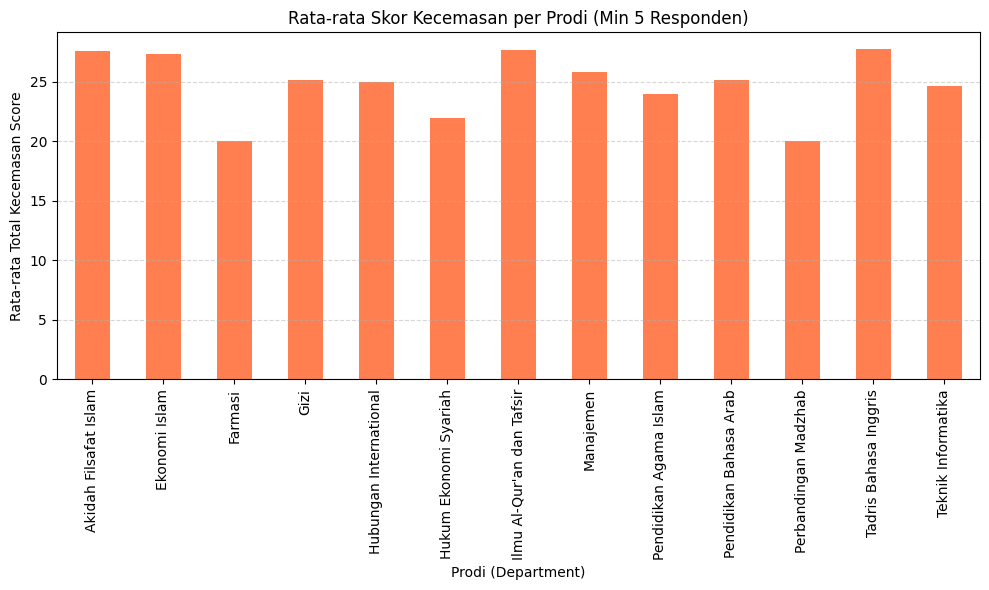

In [ ]:
avg_anxiety_by_department = df.groupby('Department')['Total_Anxiety_Score'].mean()
avg_anxiety_by_department = filtered_stats['Rata2_anxiety']

avg_anxiety_by_department.plot(kind='bar', figsize=(10,6), color='coral')
plt.title(f'Rata-rata Skor Kecemasan per Prodi (Min {min_responden} Responden)')
plt.xlabel('Prodi (Department)')
plt.ylabel('Rata-rata Total Kecemasan Score')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
prodi_tertinggi = avg_anxiety_by_department.idxmax()
skor_tertinggi = avg_anxiety_by_department.max()

print(f"🔍 Prodi dengan tingkat Anxiety rata-rata tertinggi (Min {min_responden} responden) adalah **{prodi_tertinggi}** dengan skor rata-rata {skor_tertinggi:.2f}.")


🔍 Prodi dengan tingkat Anxiety rata-rata tertinggi (Min 5 responden) adalah **Tadris Bahasa Inggris** dengan skor rata-rata 27.78.


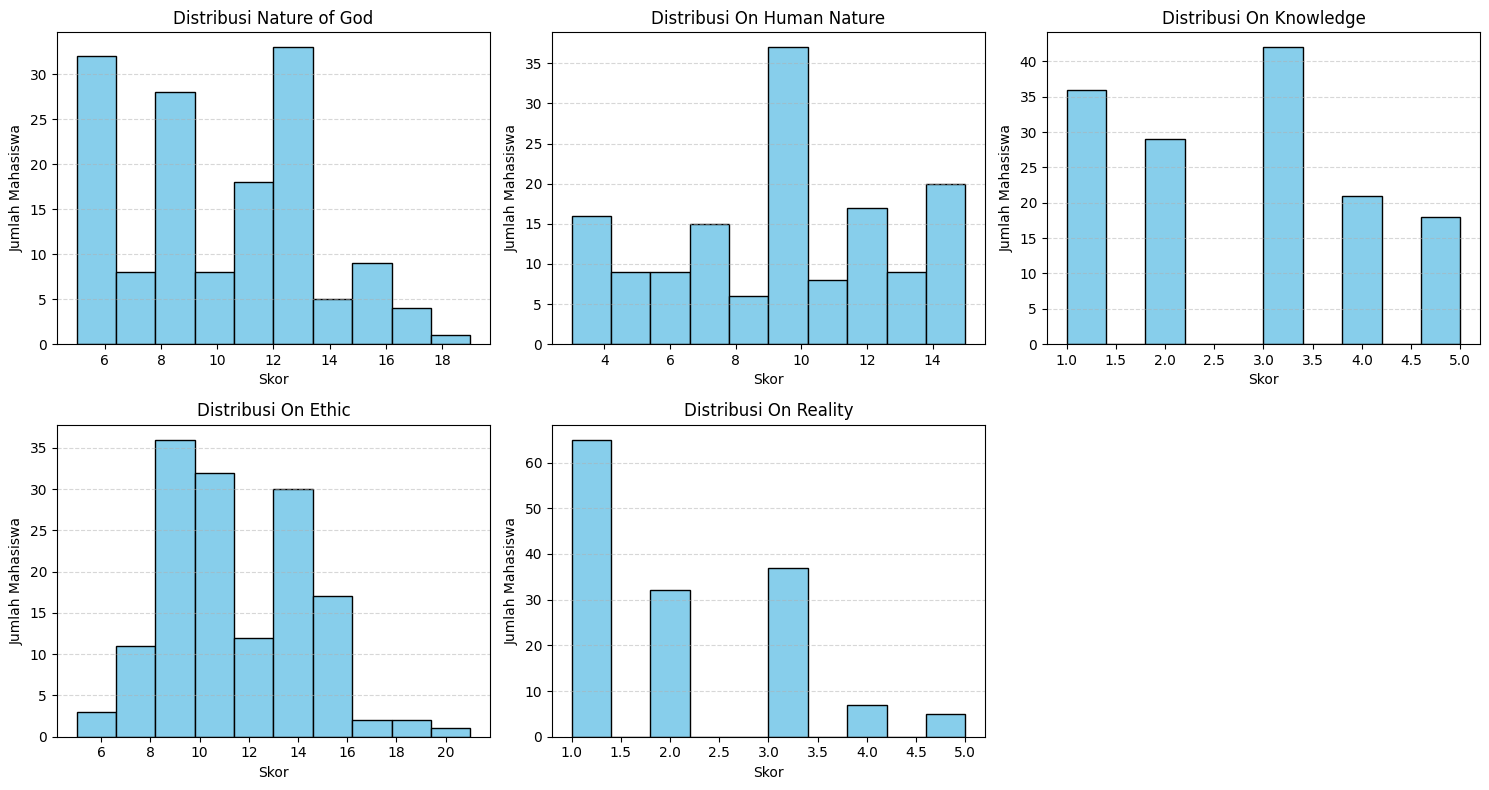

In [ ]:
aspek_cols = [
    'Nature_of_God',
    'On_Human_Nature',
    'On_Knowledge',
    'On_Ethic',
    'On_Reality'
]

titles = [
    'Nature of God',
    'On Human Nature',
    'On Knowledge',
    'On Ethic',
    'On Reality'
]

fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.flatten()

for i, col in enumerate(aspek_cols):
    df[col].plot(kind='hist',
                 bins=10,
                 ax=axs[i],
                 color='skyblue',
                 edgecolor='black')
    axs[i].set_title(f'Distribusi {titles[i]}')
    axs[i].set_xlabel('Skor')
    axs[i].set_ylabel('Jumlah Mahasiswa')
    axs[i].grid(axis='y', linestyle='--', alpha=0.5)

# Kosongkan subplot ke-6
fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()


             Aspek    F_Score       P_Value
4       On_Reality   2.501950  8.550586e-02
0    Nature_of_God  15.587247  7.518492e-07
2     On_Knowledge  36.221702  1.875870e-13
1  On_Human_Nature  58.954805  2.125623e-19
3         On_Ethic  60.313930  1.013091e-19


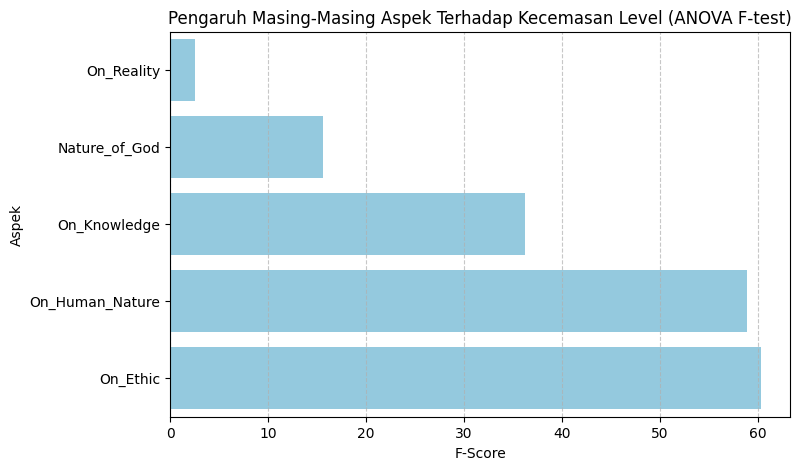

In [ ]:
# Pastikan target numerik
le = LabelEncoder()
df['Anxiety_Num'] = le.fit_transform(df['Anxiety_Level'])

X = df[aspek_cols]
y = df['Anxiety_Num']

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Buat dataframe skor
feature_scores = pd.DataFrame({
    'Aspek': aspek_cols,
    'F_Score': selector.scores_,
    'P_Value': selector.pvalues_
}).sort_values(by='F_Score', ascending=True)

print(feature_scores)

# Visual barplot
plt.figure(figsize=(8, 5))
sns.barplot(x='F_Score', y='Aspek', data=feature_scores, color='skyblue')
plt.title('Pengaruh Masing-Masing Aspek Terhadap Kecemasan Level (ANOVA F-test)')
plt.xlabel('F-Score')
plt.ylabel('Aspek')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
print(pd.Series(y).value_counts())
skf = StratifiedKFold(n_splits=3)
scores = cross_val_score(svm_model, X, y, cv=skf)

print("Cross-validated F1-scores:", scores)
print("Average F1-score:", scores.mean())

Anxiety_Num
1    84
0    58
2     4
Name: count, dtype: int64
Cross-validated F1-scores: [0.89795918 0.95918367 0.95833333]
Average F1-score: 0.9384920634920636
